In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

from sklearn.ensemble import IsolationForest

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

### Training

In [3]:
model = IsolationForest(contamination=0.001, random_state=16)
model.fit(df_train)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.001, random_state=16)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


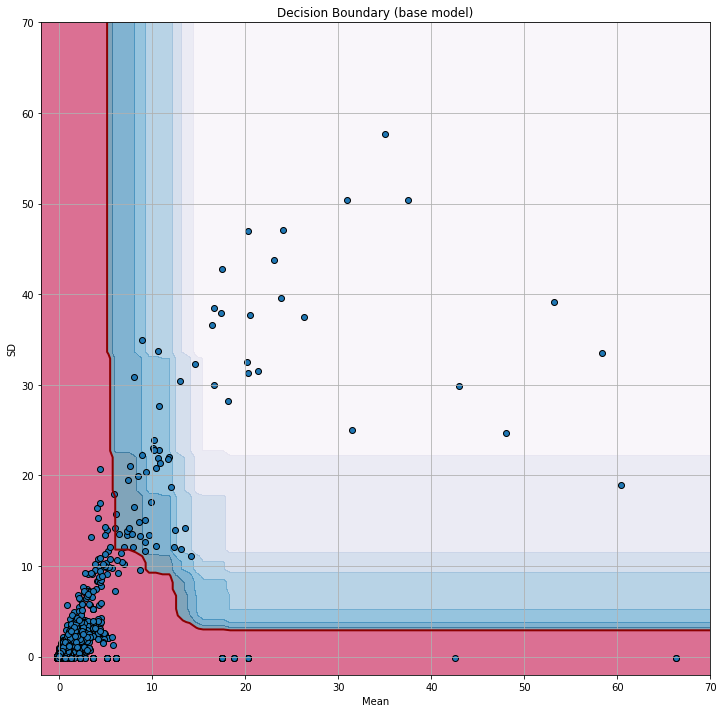

In [4]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = [12, 12]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(df_train.iloc[:, 0],
            df_train.iloc[:, 1],
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

### Test

In [5]:
predictions = model.predict(df_test)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


/usr/local/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


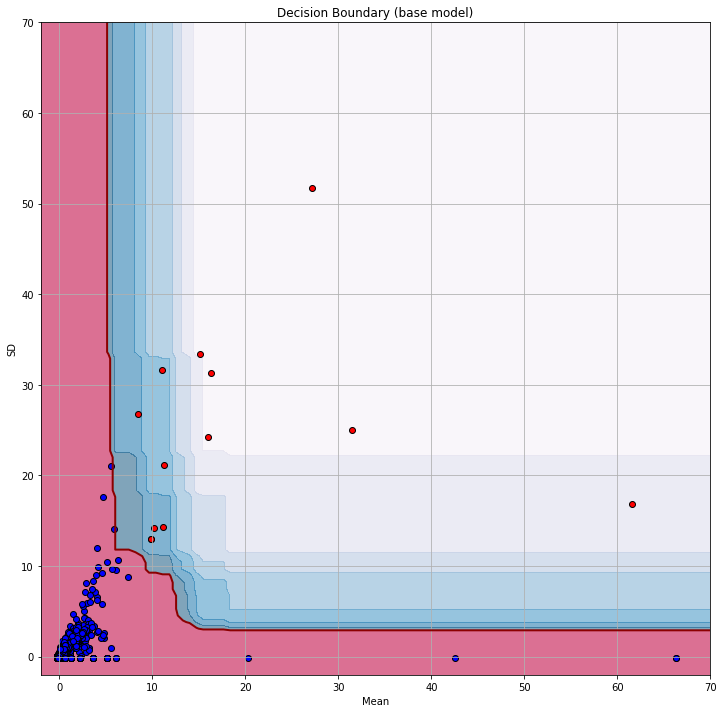

In [6]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = [12, 12]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

df_test_inliers = df_test[predictions == 1]
df_test_outliers = df_test[predictions == -1]

plt.scatter(df_test_inliers.iloc[:, 0],
            df_test_inliers.iloc[:, 1],
            color='blue',
            edgecolors='k')
plt.scatter(df_test_outliers.iloc[:, 0],
            df_test_outliers.iloc[:, 1],
            color='red',
            edgecolors='k')

plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

### Save model

In [7]:
from joblib import dump
dump(model, 'model.joblib') 

['model.joblib']